In [ ]:
%matplotlib inline


# Nearest Neighbors regression

Demonstrate the resolution of a regression problem
using a k-Nearest Neighbor and the interpolation of the
target using both barycenter and constant weights.


In [1]:
# From sklearn https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html#sphx-glr-auto-examples-neighbors-plot-regression-py
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#         Fabian Pedregosa <fabian.pedregosa@inria.fr>
#
# License: BSD 3 clause (C) INRIA

## Generate sample data



In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 1000)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

## Fit regression model for different k



The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.

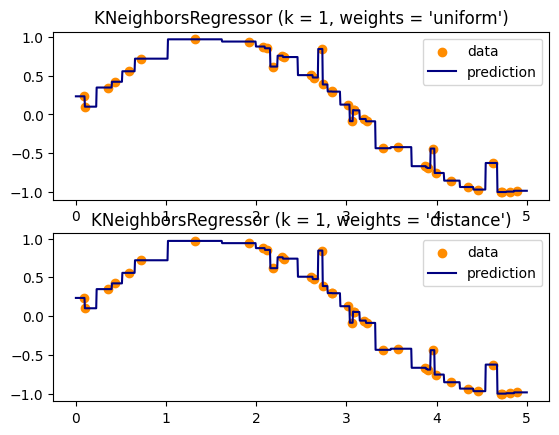

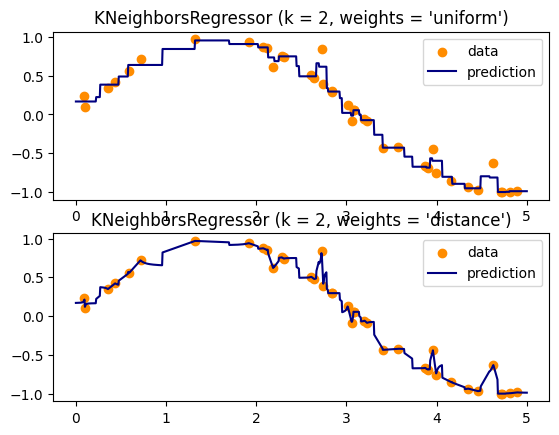

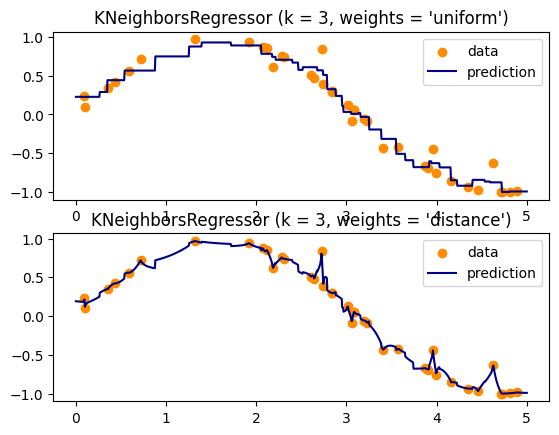

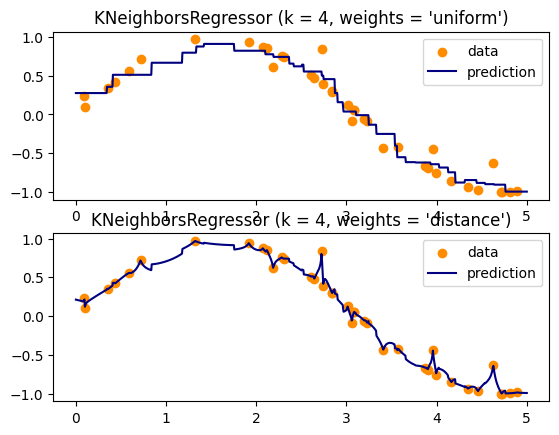

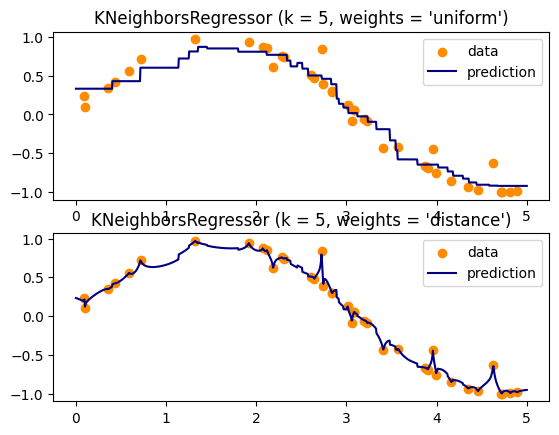

In [15]:
n_neighbors = [1,2,3,4,5]

for i, weights in enumerate(["uniform", "distance"]):
  for j in range(len(n_neighbors)):
    knn = neighbors.KNeighborsRegressor(n_neighbors[j], weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.figure(j+1)
    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors[j], weights))


plt.show()